### Simulating the generation of Random Numbers

In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
import numpy as np

$$
|0\rangle = \begin{pmatrix}
             1 \\
             0
            \end{pmatrix}
$$


$$
|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

In [16]:
zero = Statevector([1,0]) # Zero state defined from label
display(zero.draw('latex'))

<IPython.core.display.Latex object>

In [3]:
from qiskit.quantum_info import Operator

In [4]:
H = Operator([]).from_label('H') # Hadamard Gate, analagous to a beam spitter

$$
    H = \dfrac{1}{\sqrt{2}} \begin{pmatrix}
        1 & 1 \\
        1 & -1
    \end{pmatrix}
$$

In [5]:
plus = zero.evolve(H)

$$
H|0\rangle = \dfrac{1}{\sqrt{2}} \begin{pmatrix}
        1 & 1 \\
        1 & -1
    \end{pmatrix} \begin{pmatrix}
        1 \\
        0
    \end{pmatrix} = \dfrac{1}{\sqrt{2}} (|0 \rangle + |1\rangle)
$$


---

Hadamard Gate puts the qubit in **superposition**

#### Analagous to the use of a Beam Splitter


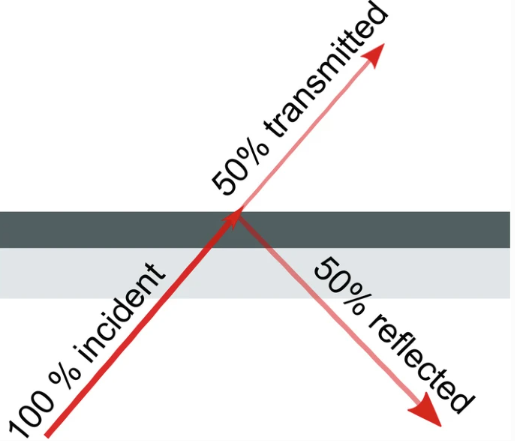

In [6]:
from qiskit.visualization import plot_histogram

{'0': 4063, '1': 4129}

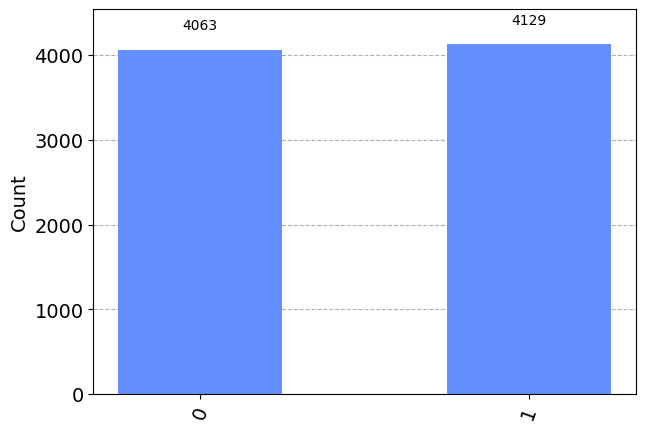

In [7]:
stat = plus.sample_counts(2**13) #8192
display(stat)
plot_histogram(stat)

The **Superposition** of the qubits can generate truly **random numbers**!


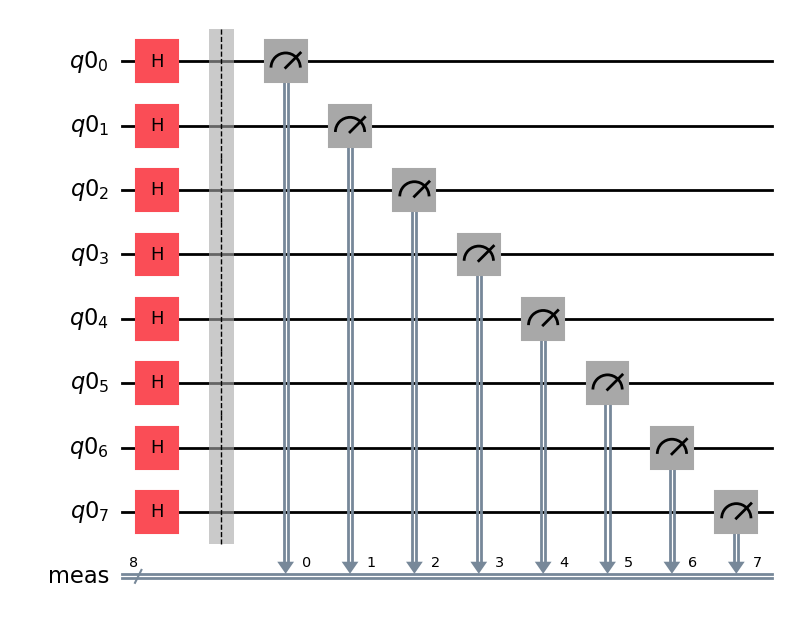

In [8]:
qr = QuantumRegister(8)
circuit = QuantumCircuit(qr)
circuit.h(qr)
circuit.measure_all()
circuit.draw('mpl',style = 'iqp')

This quantum circuit can generate a 8 bit binary number, that can produce numbers up to $2^8$.

In [9]:
def bit_from_counts(counts):
    return [k for k, v in counts.items() if v == 1][0]
### Gets the 'bit' from the dictionary

In [10]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
bits = []
for i in range(15):
    simulator = AerSimulator()
    circuit_simulator = simulator.run(circuit, shots=1)
    statistics = circuit_simulator.result().get_counts()
    bits.append(bit_from_counts(statistics))
    display(statistics)

{'11010100': 1}

{'11010000': 1}

{'10100110': 1}

{'10010001': 1}

{'11010001': 1}

{'10010101': 1}

{'01111001': 1}

{'01011001': 1}

{'10001011': 1}

{'01011110': 1}

{'01011010': 1}

{'10000110': 1}

{'00011000': 1}

{'01000000': 1}

{'11010101': 1}

In [12]:
bits

['11010100',
 '11010000',
 '10100110',
 '10010001',
 '11010001',
 '10010101',
 '01111001',
 '01011001',
 '10001011',
 '01011110',
 '01011010',
 '10000110',
 '00011000',
 '01000000',
 '11010101']

In [13]:
random_numbers = [int(i, 2) for i in bits]### So this 8 qubit circuit can generate random numbers
for i in range(len(random_numbers)):
    print(random_numbers[i])

212
208
166
145
209
149
121
89
139
94
90
134
24
64
213


The chr() python function takes an integer and returns a string representing the corresponding Unicode character.

In [15]:


password = ''
for i in range(len(random_numbers)):
    symbol = chr(random_numbers[i])
    password += symbol
# Output the symbol
print("Symbol generated from bit:", password)

Symbol generated from bit: ÔÐ¦ÑyY^Z@Õ


Using "Quantum Processes" we were able to generate "Random Numbers" which were used to create a random password.